In [1]:
# imporing libararies

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(12,8)

In [2]:
# reading the file/data
pd.set_option("display.max_rows",None)
data=pd.read_csv("movies.csv")

In [3]:
# cheaking the first 5 rows of data
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# cheking if there is any missing values

for col in data.columns:
    null_values=np.mean(data[col].isnull())
    print("{} - {:.1f}%".format(col,null_values))

    

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.3%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [5]:

# total null values in budget columns
data["budget"].isnull().sum()

2171

In [6]:
data['budget'] = data['budget'].fillna((data['budget'].mean()))
data['gross'] = data['gross'].fillna((data['gross'].mean()))



In [7]:
# Data types for the columns
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# changing data types of budget from float to integer
data["budget"]=data["budget"].astype("int64")
data["gross"]=data["gross"].astype("int64")

In [9]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   int64  
 12  gross     7668 non-null   int64  
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 898.7+ KB


In [12]:
# based on the below information
# The movies are from 1980 to 2020
# There are about 7668 titles

data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.00,2000.0,2010.0,2.020000e+03
score,7665.0,6.390411e+00,9.688416e-01,1.9,5.80,6.5,7.1,9.300000e+00
votes,7665.0,8.810850e+04,1.633238e+05,7.0,9100.00,33000.0,93000.0,2.400000e+06
budget,7668.0,3.558988e+07,3.510036e+07,3000.0,14000000.00,35589876.0,35589876.0,3.560000e+08
gross,7668.0,7.850054e+07,1.636697e+08,309.0,4681150.75,21413303.5,78500541.0,2.847246e+09
runtime,7664.0,1.072616e+02,1.858125e+01,55.0,95.00,104.0,116.0,3.660000e+02


In [17]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [29]:
# Removing countries name from column released
data["released"]= data["released"].str.split("(", expand=True)[0]
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedNew
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"


In [32]:
data["released"]=pd.to_datetime(data["released"])
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedNew
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"


In [38]:
# looking at the top 10 oldesr movie
Oldest = data.sort_values("released", ascending = True)
Oldest[['name',"company", "released"]][:10]

,name,company,released
74,Just Tell Me What You Want,Warner Bros.,1980-01-18
81,Windows,Mike Lobell Productions,1980-01-18
29,American Gigolo,Paramount Pictures,1980-02-01
65,Fatso,Brooksfilms,1980-02-01
69,Hero at Large,Kings Road Entertainment,1980-02-08
18,The Fog,AVCO Embassy Pictures,1980-02-08
66,Moscow Does Not Believe in Tears,Mosfilm,1980-02-11
20,Cruising,Lorimar Film Entertainment,1980-02-15
39,Coal Miner's Daughter,Universal Pictures,1980-03-07
83,The King and the Mockingbird,Les Films Paul Grimault,1980-03-19


In [36]:
# looking at the top 10 newest movie
New_Movie = data.sort_values("released", ascending = False)
New_Movie [['name',"company", "released"]][:10]

,name,company,released
7644,Wonder Woman 1984,Atlas Entertainment,2020-12-25
7662,The Robinsons,NaN,2020-11-10
7661,Love by Drowning,Dow Jazz Films,2020-11-06
7660,Aloha Surf Hotel,Abominable Pictures,2020-11-05
7663,More to Life,NaN,2020-10-23
7666,It's Just Us,NaN,2020-10-01
7655,Legend of Deification,Beijing Enlight Pictures,2020-10-01
7657,Leap,NaN,2020-09-25
7654,Star Trek First Frontier,An Impulsive Production,2020-09-08
7643,Tenet,Warner Bros.,2020-09-03


In [42]:
# Top 10 countries with most released movies
Countries = pd.DataFrame(data['country'].value_counts())
Top_countries =pd.DataFrame(data['country'].value_counts()).head(15)
Top_countries

,country
United States,5475
United Kingdom,816
France,279
Canada,190
Germany,117
Australia,92
Japan,81
India,62
Italy,61
Spain,47


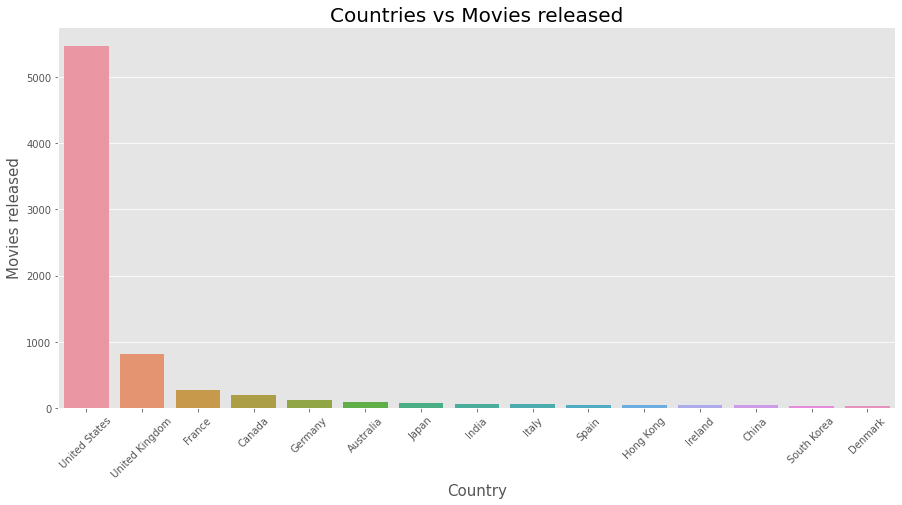

In [46]:
sns.barplot(x = Top_countries.index, y = Top_countries['country'])

labels =Top_countries.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Countries vs Movies released', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Movies released', fontsize = 15)

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14] , labels = labels, rotation = '45')
plt.show()

In [47]:
data.groupby('company').size()

company
"DIA" Productions GmbH & Co. KG        1
"Weathering With You" Film Partners    1
.406 Production                        1
1+2 Seisaku Iinkai                     1
10 West Studios                        1
                                      ..
i am OTHER                             1
i5 Films                               1
iDeal Partners Film Fund               1
micro_scope                            1
thefyzz                                1
Length: 2385, dtype: int64

In [50]:
companies = data['company'].value_counts()
companies = pd.DataFrame(companies) 
companies = companies.head(15) 
companies.head(5)

,company
Universal Pictures,377
Warner Bros.,334
Columbia Pictures,332
Paramount Pictures,320
Twentieth Century Fox,240


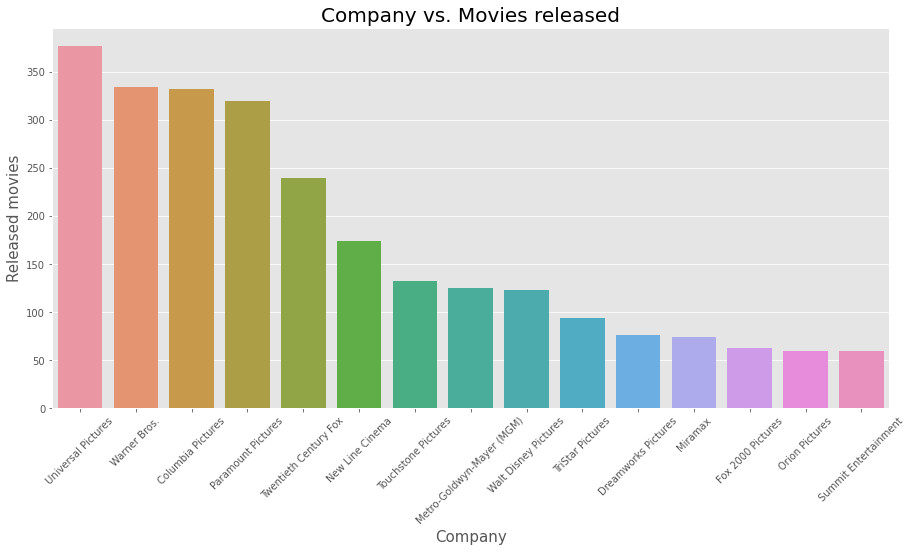

In [52]:
sns.barplot(x = companies.index, y = companies['company'])

labels = companies.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Company vs. Movies released', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Released movies', fontsize = 15)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14] , labels = labels, rotation = '45')
plt.show()

In [87]:
# Adventure movies from USA
tag = "Adventure"
genre_mov = data[data["genre"] == tag]
genre_mov=genre_mov[genre_mov["country"] == "United States"][["name", "country","year"]].head(10)
genre_mov

,name,country,year
1,The Blue Lagoon,United States,1980
12,Popeye,United States,1980
21,Heaven's Gate,United States,1980
60,Herbie Goes Bananas,United States,1980
75,The Last Flight of Noah's Ark,United States,1980
79,Windwalker,United States,1980
120,Tarzan the Ape Man,United States,1981
186,Back Roads,United States,1981
192,The Pursuit of D.B. Cooper,United States,1981
335,National Lampoon's Vacation,United States,1983


In [97]:
# Horror movies from Australia
tag = "Horror"
genre_mov = data[data["genre"] == tag]
genre_mov=genre_mov[genre_mov["country"] == "Australia"][["name", "country","year"]].head(10)
genre_mov

,name,country,year
575,Razorback,Australia,1984
1495,Dead Calm,Australia,1989
3308,Disturbing Behavior,Australia,1998
4676,House of Wax,Australia,2005
4715,Wolf Creek,Australia,2005


In [95]:
# Top  high gross movies from differnt companies with budget
high_gross = data.groupby(['name','company',"country"])[['budget','gross']].apply(sum).sort_values(by='gross',ascending=False)
high_gross=high_gross.head(10)
high_gross=pd.DataFrame(high_gross)
high_gross


,,,budget,gross
name,company,country,,
Avatar,Twentieth Century Fox,United States,237000000,2847246203
Avengers: Endgame,Marvel Studios,United States,356000000,2797501328
The Lion King,Walt Disney Pictures,United States,305000000,2754448457
Titanic,Twentieth Century Fox,United States,200000000,2201647264
Star Wars: Episode VII - The Force Awakens,Lucasfilm,United States,245000000,2069521700
Avengers: Infinity War,Marvel Studios,United States,321000000,2048359754
Jurassic World,Universal Pictures,United States,150000000,1670516444
The Avengers,Marvel Studios,United States,220000000,1518815515
Furious 7,Universal Pictures,United States,190000000,1515341399


In [107]:
movies_gross=data.groupby(['name'])[['gross']].apply(sum).sort_values(by='gross',ascending=False)
movies_gross=movies_gross.head(10)
movies_gross.reset_index(inplace=True)
movies_gross

,name,gross
0,Avatar,2847246203
1,Avengers: Endgame,2797501328
2,The Lion King,2754448457
3,Titanic,2201647264
4,Star Wars: Episode VII - The Force Awakens,2069521700
5,Avengers: Infinity War,2048359754
6,Beauty and the Beast,1689402145
7,Jurassic World,1670516444
8,Aladdin,1554744172
9,The Avengers,1542200454


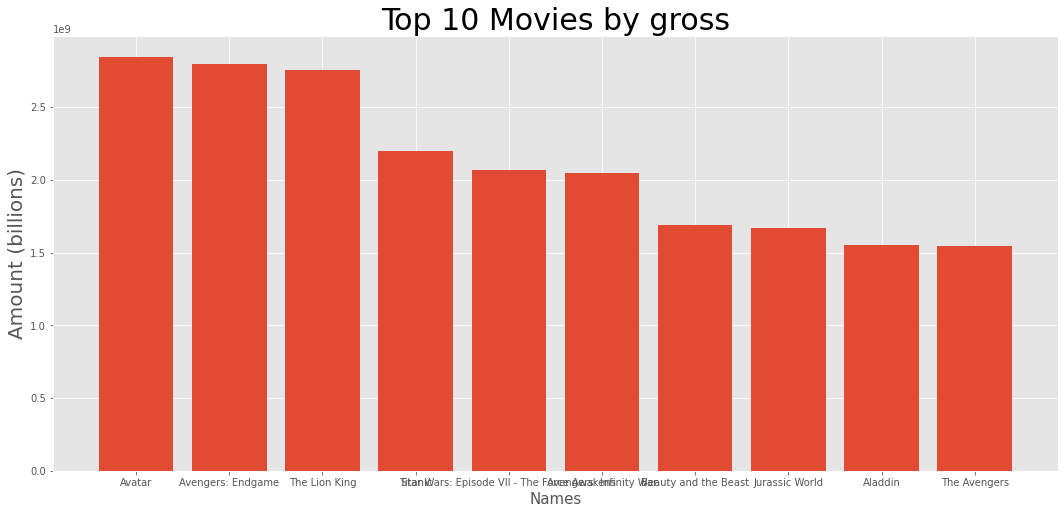

In [116]:
fig = plt.figure(figsize=(18,8))
plt.bar(movies_gross['name'],movies_gross['gross'])
plt.title("Top 10 Movies by gross",size=30)
plt.xlabel("Names",size=15)
plt.ylabel("Amount (billions)",size=20)
plt.show()

In [113]:
genre_gross=data.groupby(['genre'])[['gross']].sum().sort_values(by='gross',ascending=False)

genre_gross.reset_index(inplace=True)
genre_gross

,genre,gross
0,Action,245947873066
1,Comedy,101335997135
2,Animation,80377547419
3,Drama,61075675587
4,Adventure,46466100480
5,Crime,22061953191
6,Biography,21514587211
7,Horror,15720837717
8,Family,2157897417
9,Mystery,2023670554


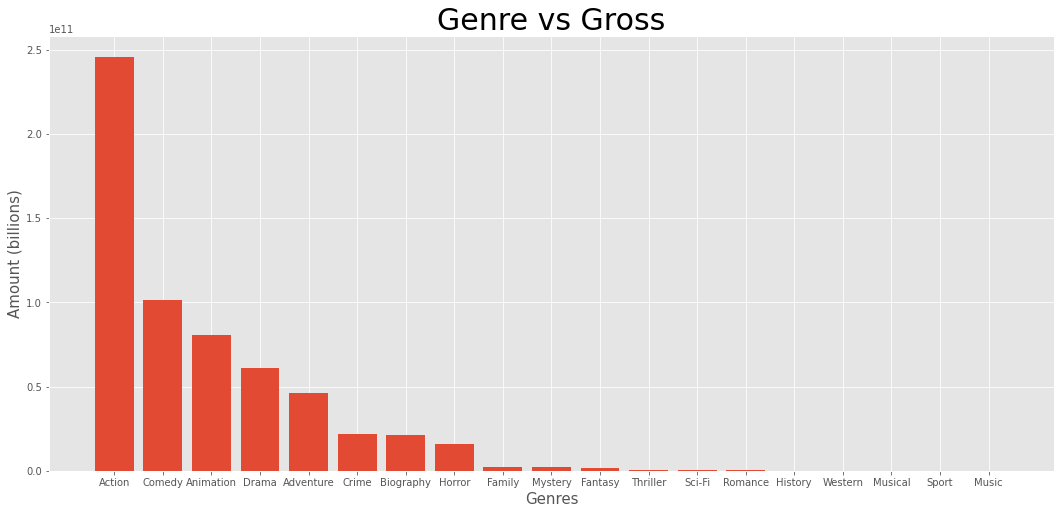

In [114]:
fig = plt.figure(figsize=(18,8))
plt.bar(genre_gross['genre'],genre_gross['gross'])
plt.title("Genre vs Gross",size=30)
plt.xlabel("Genres",size=15)
plt.ylabel("Amount (billions)",size=15)
plt.show()



In [ ]:
data=data.sort_values(by=["gross"],inplace=False, ascending=False)

In [ ]:
# Dropping duplicates

data["company"].drop_duplicates().sort_values(ascending=False)

In [ ]:
data.head(5)

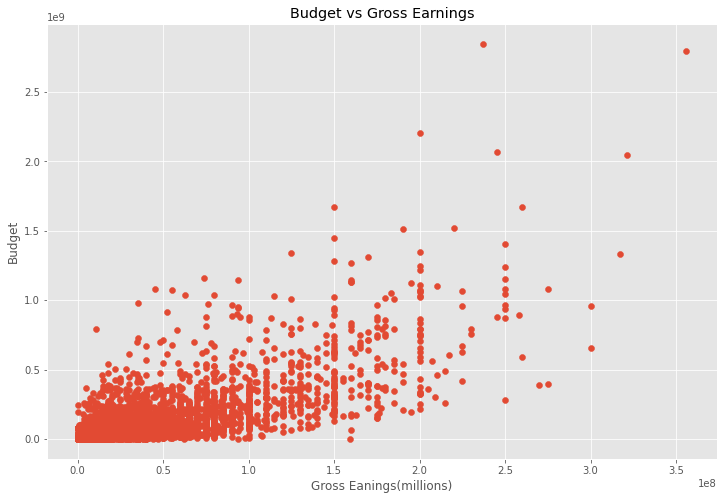

In [117]:
# Scatter plot between budget and gross

plt.scatter(x=data["budget"],y=data["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Eanings(millions)")
plt.ylabel("Budget")
plt.show()


In [ ]:
data.head(10)

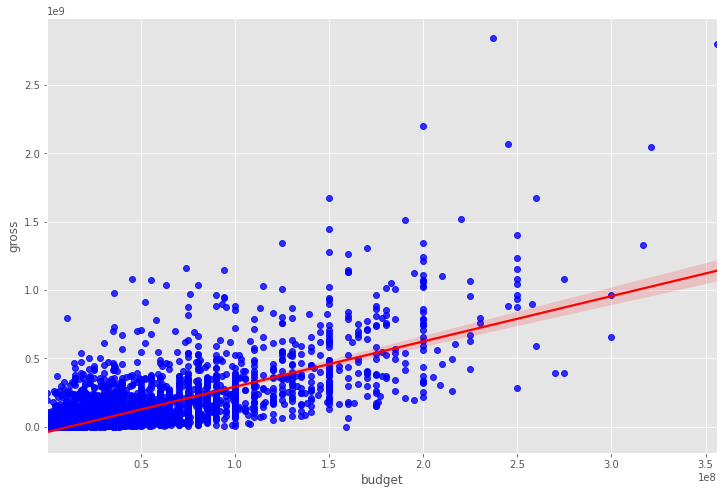

In [118]:
# plotting budget VS GROSS using seaborn

sns.regplot(x="budget",y="gross",data=data,scatter_kws={"Color":"blue"},line_kws={"color":"red"})

In [119]:
# cheking the correlations
data.corr(method="spearman")

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.202558,0.267101,0.142977
score,0.099045,1.000000,0.428138,0.004735,0.118024,0.399857
votes,0.469829,0.428138,1.000000,0.235205,0.688537,0.290159
budget,0.202558,0.004735,0.235205,1.000000,0.361668,0.227921
gross,0.267101,0.118024,0.688537,0.361668,1.000000,0.227892
runtime,0.142977,0.399857,0.290159,0.227921,0.227892,1.000000


<Figure size 1080x720 with 0 Axes>

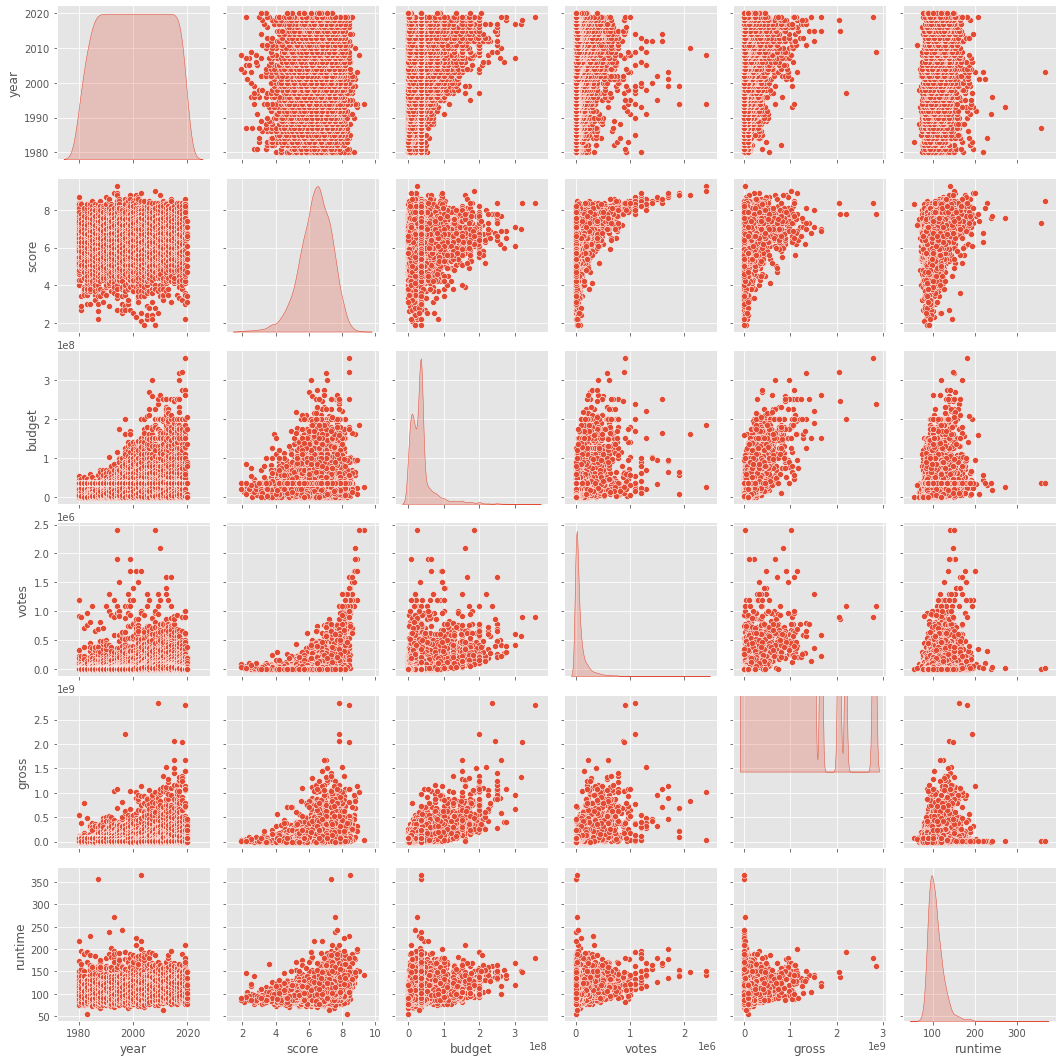

In [150]:
plt.figure(1,figsize=(15,10))
sns.pairplot(data[["year","score",'budget','votes','gross','runtime']],diag_kind="kde")


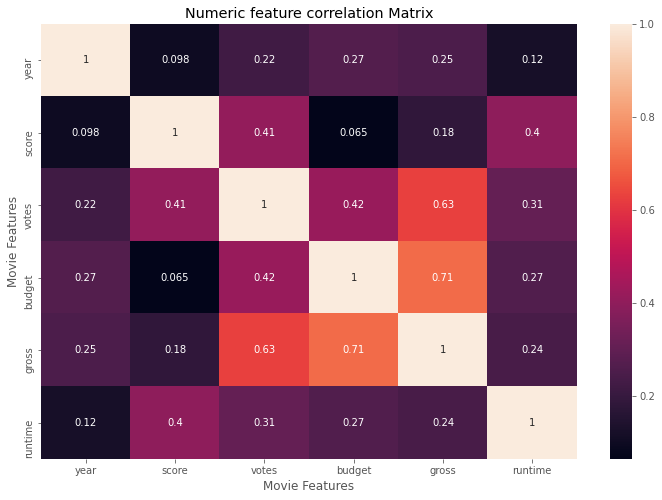

In [120]:
# light color means high correlation and dark color low correlation
# There is high correlation between expected gross and budget and gross vs Votes

corr_matrix= data.corr(method="pearson")
sns.heatmap(corr_matrix,annot=True)
plt.title("Numeric feature correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

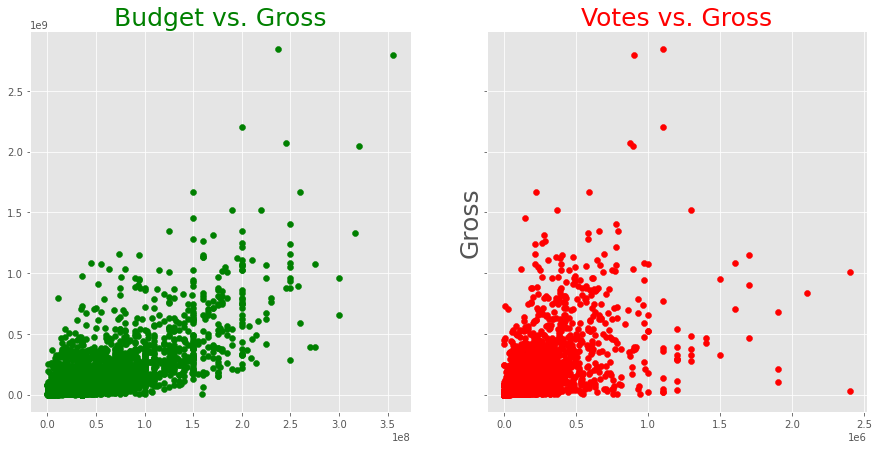

In [124]:

# As can be seen below there are clear correlation between 'Budget' and 'Gross', 
# and also a relationship between the 'Vote' and 'Gross' variables.

f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

plt.gcf().set_size_inches(15, 7)
ax1.scatter(data["budget"], data["gross"], c = 'green')
ax1.set_title('Budget vs. Gross', c = 'green', fontsize = 25)
ax2.scatter(data["votes"], data["gross"], c='red')
ax2.set_title('Votes vs. Gross', c ='red', fontsize = 25)

plt.ylabel('Gross', fontsize = 25)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

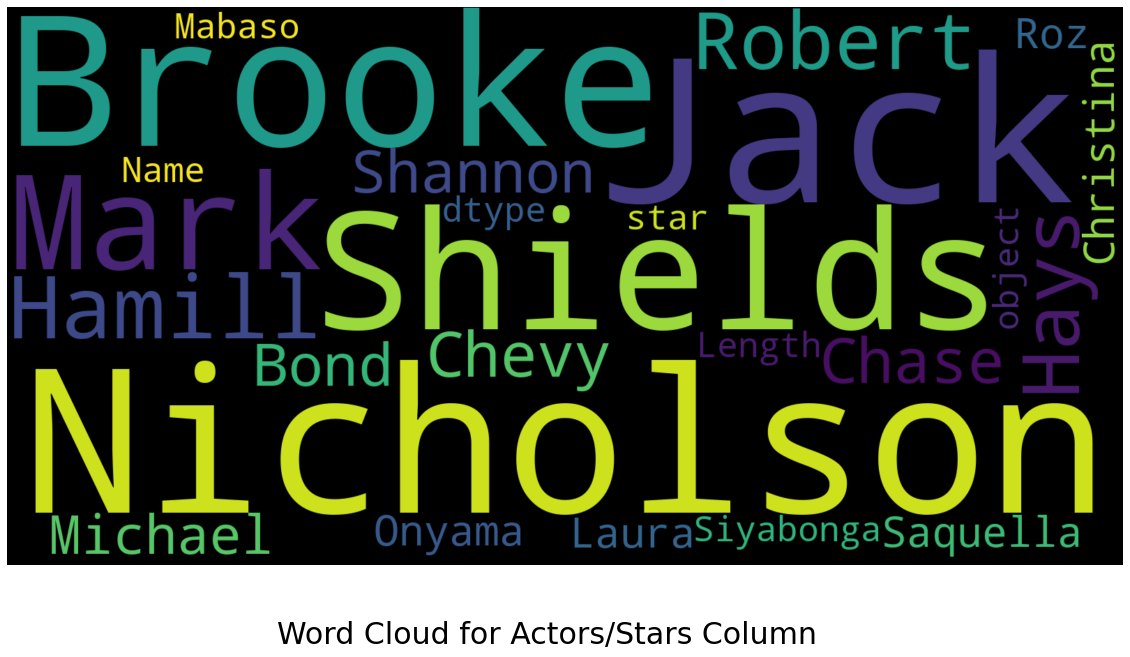

In [146]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 50 , width = 1600 , height = 800).generate(str(data['star']))
plt.suptitle('Word Cloud for Actors/Stars Column', fontsize=30)
plt.subplots_adjust(top=2.3)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

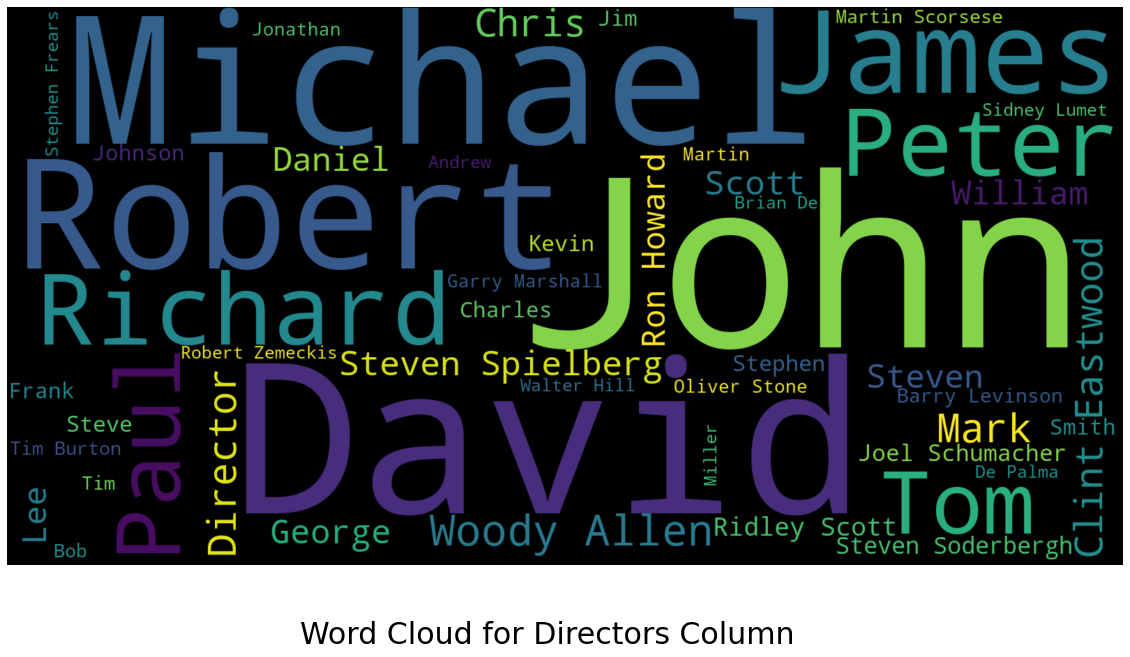

In [145]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 50 , width = 1600 , height = 800).generate(" ".join(data['director']))
plt.suptitle('Word Cloud for Directors Column', fontsize=30)
plt.subplots_adjust(top=2.3)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show